CTP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
n_samples = 10_000
sample_size = 30

In [8]:
uniform_data = np.random.uniform(0, 10, (n_samples, sample_size))
uniform_data

array([[4.68412758, 7.90615623, 6.91190476, ..., 4.58190855, 5.04291771,
        7.7006314 ],
       [4.12483649, 4.09469075, 8.4814929 , ..., 1.04843828, 3.7837399 ,
        9.57789265],
       [9.92963792, 1.76994485, 7.5524261 , ..., 9.98250431, 2.40626918,
        0.90577156],
       ...,
       [3.50866941, 5.85922697, 5.608161  , ..., 6.30620845, 5.8420316 ,
        2.22675683],
       [4.07550203, 3.53940201, 7.54706365, ..., 0.05539195, 8.0124809 ,
        1.70620224],
       [0.50476794, 9.59798322, 2.01464158, ..., 4.72647084, 2.86478213,
        4.31936611]])

In [6]:
sample_means = np.mean(uniform_data, axis=1)

In [9]:
sample_means

array([4.85150587, 5.3340901 , 5.2708882 , ..., 4.80342065, 3.92732477,
       5.46810826])

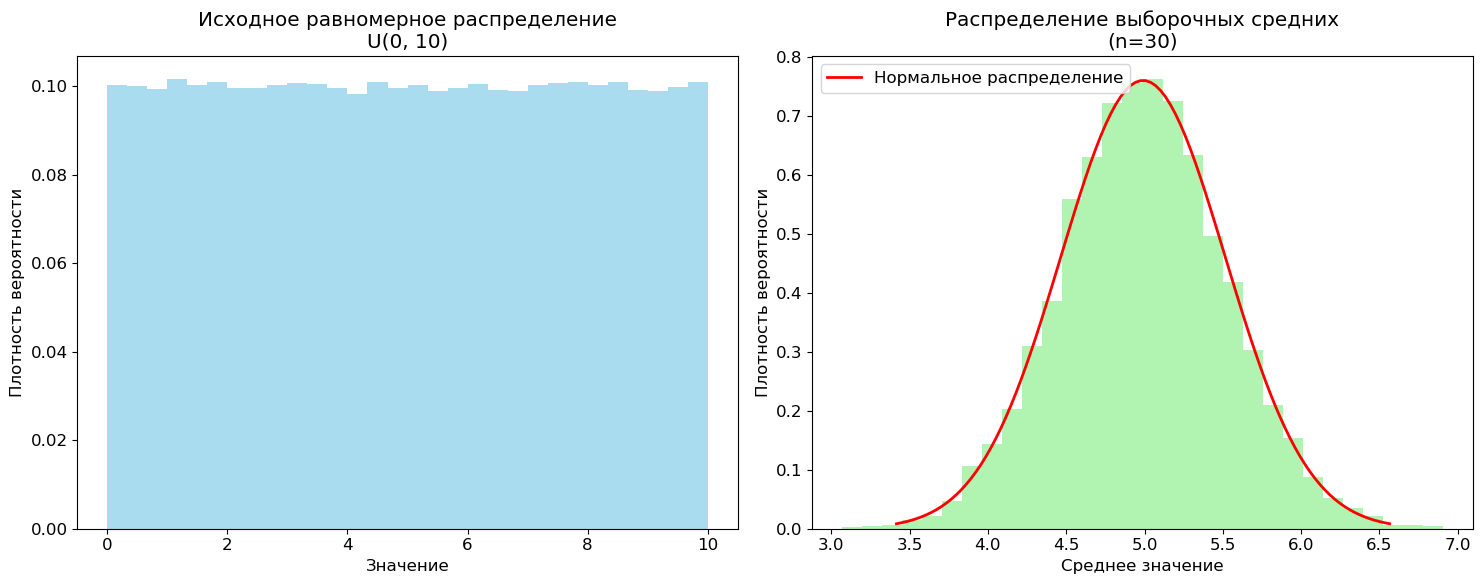

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.hist(uniform_data.flatten(), bins=30, density=True, alpha=0.7, color='skyblue')
ax1.set_title('Исходное равномерное распределение\nU(0, 10)')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')
# Распределение выборочных средних
ax2.hist(sample_means, bins=30, density=True, alpha=0.7, color='lightgreen')
ax2.set_title('Распределение выборочных средних\n(n=30)')
ax2.set_xlabel('Среднее значение')
ax2.set_ylabel('Плотность вероятности')
# Добавляем теоретическую нормальную кривую
mu = np.mean(sample_means)
sigma = np.std(sample_means)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Нормальное распределение')
ax2.legend()

plt.tight_layout()
plt.show()


In [14]:
# Проверка нормальности с помощью теста Shapiro-Wilk
stat, p_value = stats.shapiro(sample_means)
print(f"Тест Shapiro-Wilk: p-value = {p_value:.4f}")
print("Распределение средних является нормальным" if p_value > 0.05 else "Распределение средних не является нормальным")

Тест Shapiro-Wilk: p-value = 0.2021
Распределение средних является нормальным


In [15]:
# Генерируем данные из экспоненциального распределения
exp_data = np.random.exponential(scale=2, size=(n_samples, sample_size))
exp_data

array([[2.93371378, 1.45686617, 4.68801041, ..., 1.67719743, 6.30465641,
        5.17674801],
       [2.24684637, 0.11194235, 5.09236394, ..., 0.41080701, 1.19136897,
        2.32239342],
       [7.23426191, 4.21000685, 2.54351377, ..., 0.18882958, 3.59420706,
        2.86728694],
       ...,
       [4.27144372, 2.06801516, 1.51949241, ..., 2.42226532, 1.38345848,
        0.34962254],
       [1.88719297, 0.32782614, 0.94038806, ..., 1.6360668 , 0.91980443,
        0.17654761],
       [1.32066408, 1.4109027 , 0.89357617, ..., 0.68894829, 2.12849446,
        0.18946397]])

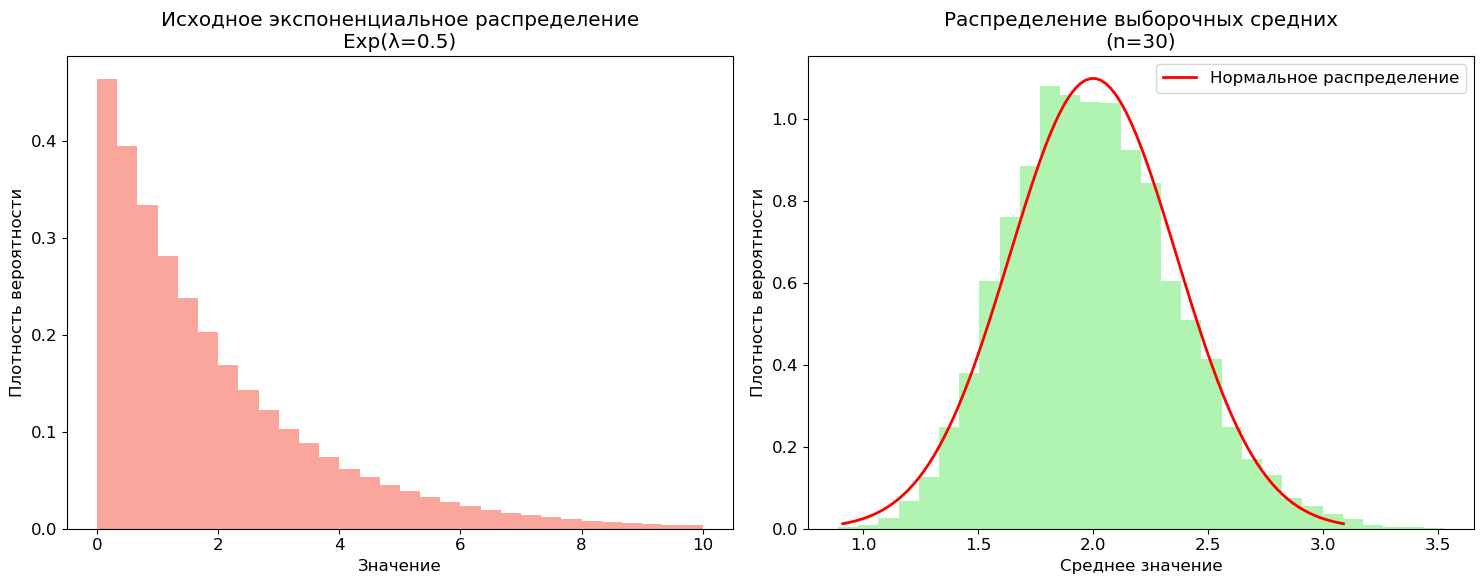

Тест Shapiro-Wilk: p-value = 0.0000
Распределение средних не является нормальным


In [22]:
# Генерируем данные из экспоненциального распределения
exp_data = np.random.exponential(scale=2, size=(n_samples, sample_size))

# Вычисляем средние для каждой выборки
exp_means = np.mean(exp_data, axis=1)

# Строим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Исходное распределение
ax1.hist(exp_data.flatten(), bins=30, density=True, alpha=0.7, color='salmon', range=(0, 10))
ax1.set_title('Исходное экспоненциальное распределение\nExp(λ=0.5)')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')

# Распределение выборочных средних
ax2.hist(exp_means, bins=30, density=True, alpha=0.7, color='lightgreen')
ax2.set_title('Распределение выборочных средних\n(n=30)')
ax2.set_xlabel('Среднее значение')
ax2.set_ylabel('Плотность вероятности')

# Добавляем теоретическую нормальную кривую
mu_exp = np.mean(exp_means)
sigma_exp = np.std(exp_means)
x_exp = np.linspace(mu_exp - 3*sigma_exp, mu_exp + 3*sigma_exp, 100)
ax2.plot(x_exp, stats.norm.pdf(x_exp, mu_exp, sigma_exp), 'r-', lw=2, label='Нормальное распределение')
ax2.legend()

plt.tight_layout()
plt.show()

# Проверка нормальности
stat_exp, p_value_exp = stats.shapiro(exp_means)
print(f"Тест Shapiro-Wilk: p-value = {p_value_exp:.4f}")
print("Распределение средних является нормальным" if p_value_exp > 0.05 else "Распределение средних не является нормальным")


In [ ]:
# Распределение выборочных средних
ax2.hist(exp_means, bins=30, density=True, alpha=0.7, color='lightgreen')
ax2.set_title('Распределение выборочных средних\n(n=30)')
ax2.set_xlabel('Среднее значение')
ax2.set_ylabel('Плотность вероятности')


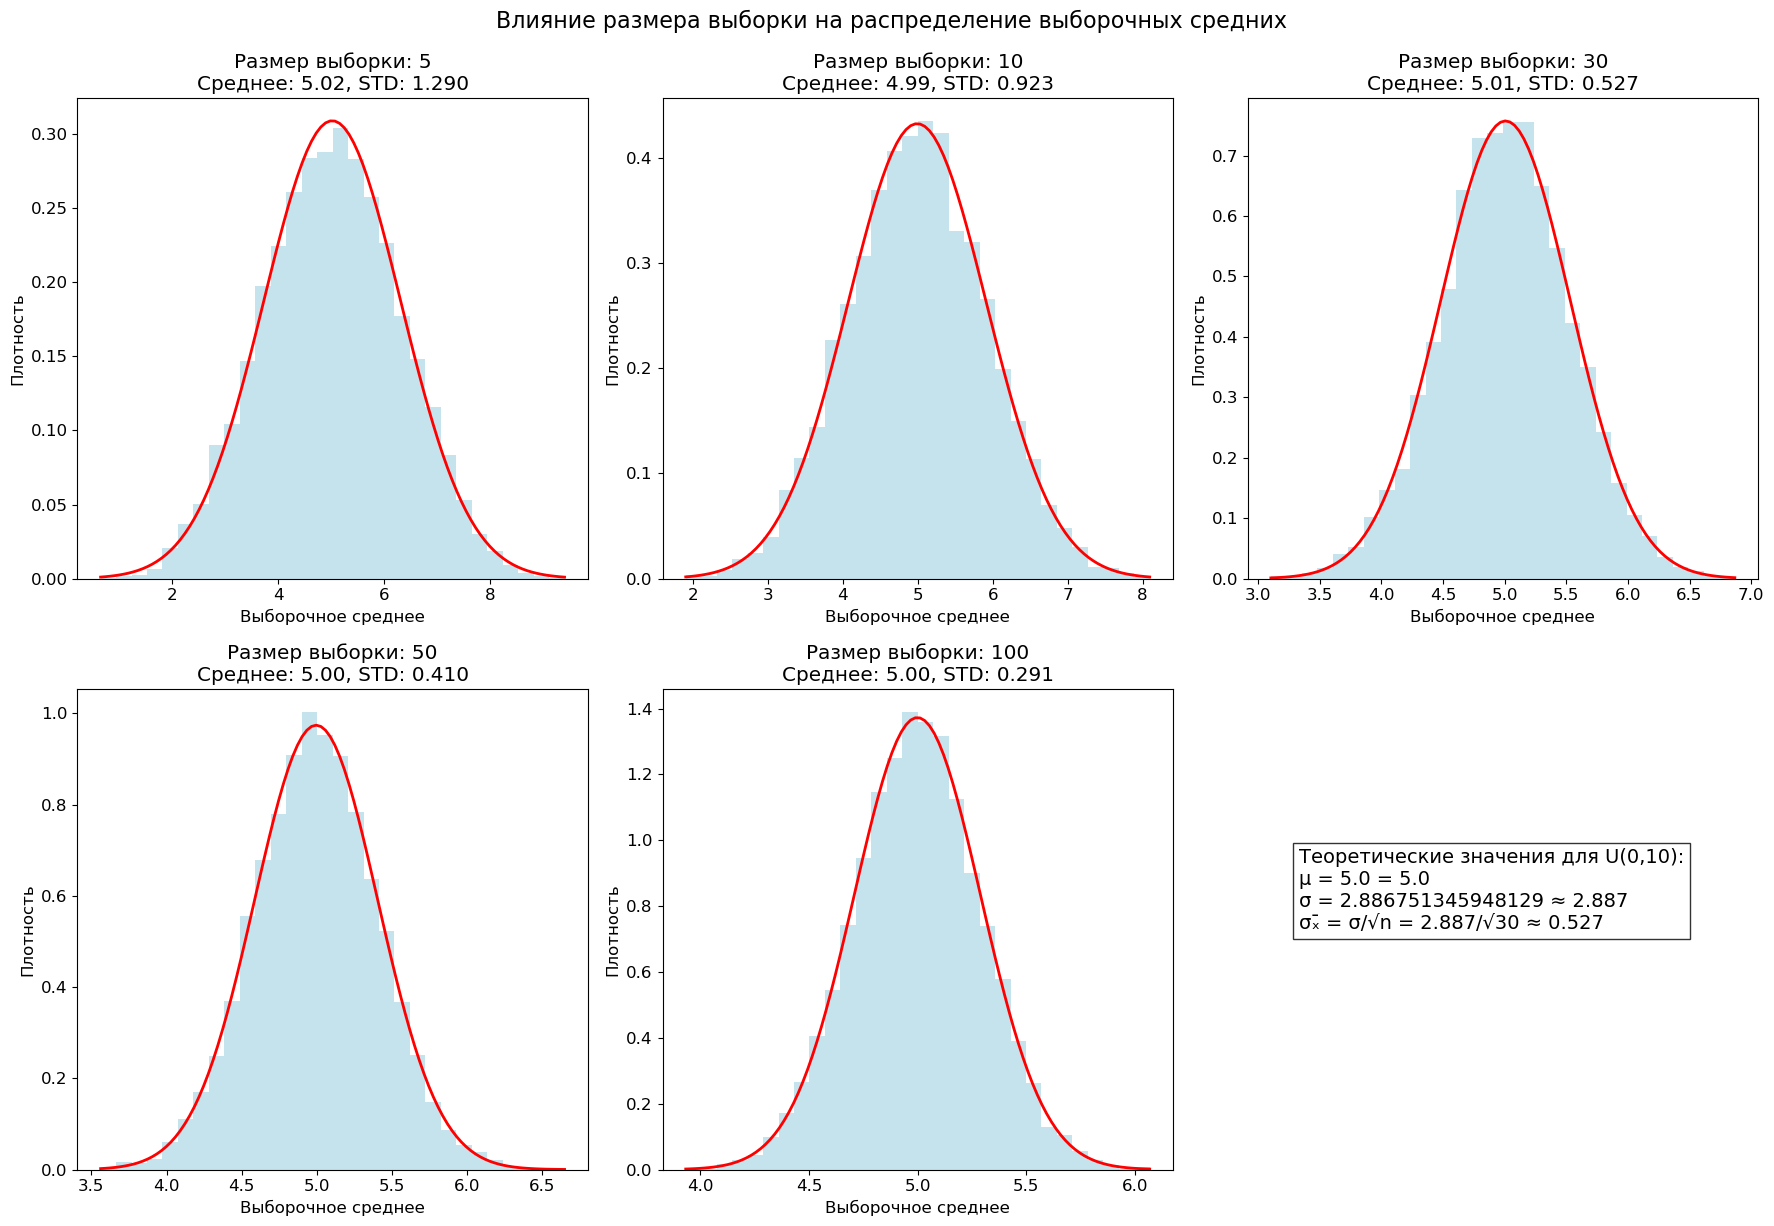

In [25]:
# Исследуем, как размер выборки влияет на нормальность распределения средних
sample_sizes = [5, 10, 30, 50, 100]
n_experiments = 10000

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, size in enumerate(sample_sizes):
    # Генерируем данные из равномерного распределения
    data = np.random.uniform(0, 10, (n_experiments, size))
    means = np.mean(data, axis=1)
    
    # Строим гистограмму
    axes[i].hist(means, bins=30, density=True, alpha=0.7, color='lightblue')
    axes[i].set_title(f'Размер выборки: {size}\nСреднее: {np.mean(means):.2f}, STD: {np.std(means):.3f}')
    axes[i].set_xlabel('Выборочное среднее')
    axes[i].set_ylabel('Плотность')
    
    # Добавляем нормальную кривую
    x = np.linspace(np.min(means), np.max(means), 100)
    axes[i].plot(x, stats.norm.pdf(x, np.mean(means), np.std(means)), 'r-', lw=2)

# Теоретический расчет для n=30
size = 30
theoretical_std = 10 / np.sqrt(12 * size)  # STD равномерного распределения = (b-a)/√12
axes[-1].axis('off')
axes[-1].text(0.1, 0.5, 
             f'Теоретические значения для U(0,10):\n'
             f'μ = {(0+10)/2} = 5.0\n'
             f'σ = {(10-0)/np.sqrt(12)} ≈ 2.887\n'
             f'σₓ̄ = σ/√n = 2.887/√{size} ≈ {2.887/np.sqrt(size):.3f}',
             fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.suptitle('Влияние размера выборки на распределение выборочных средних', fontsize=16, y=1.02)
plt.show()

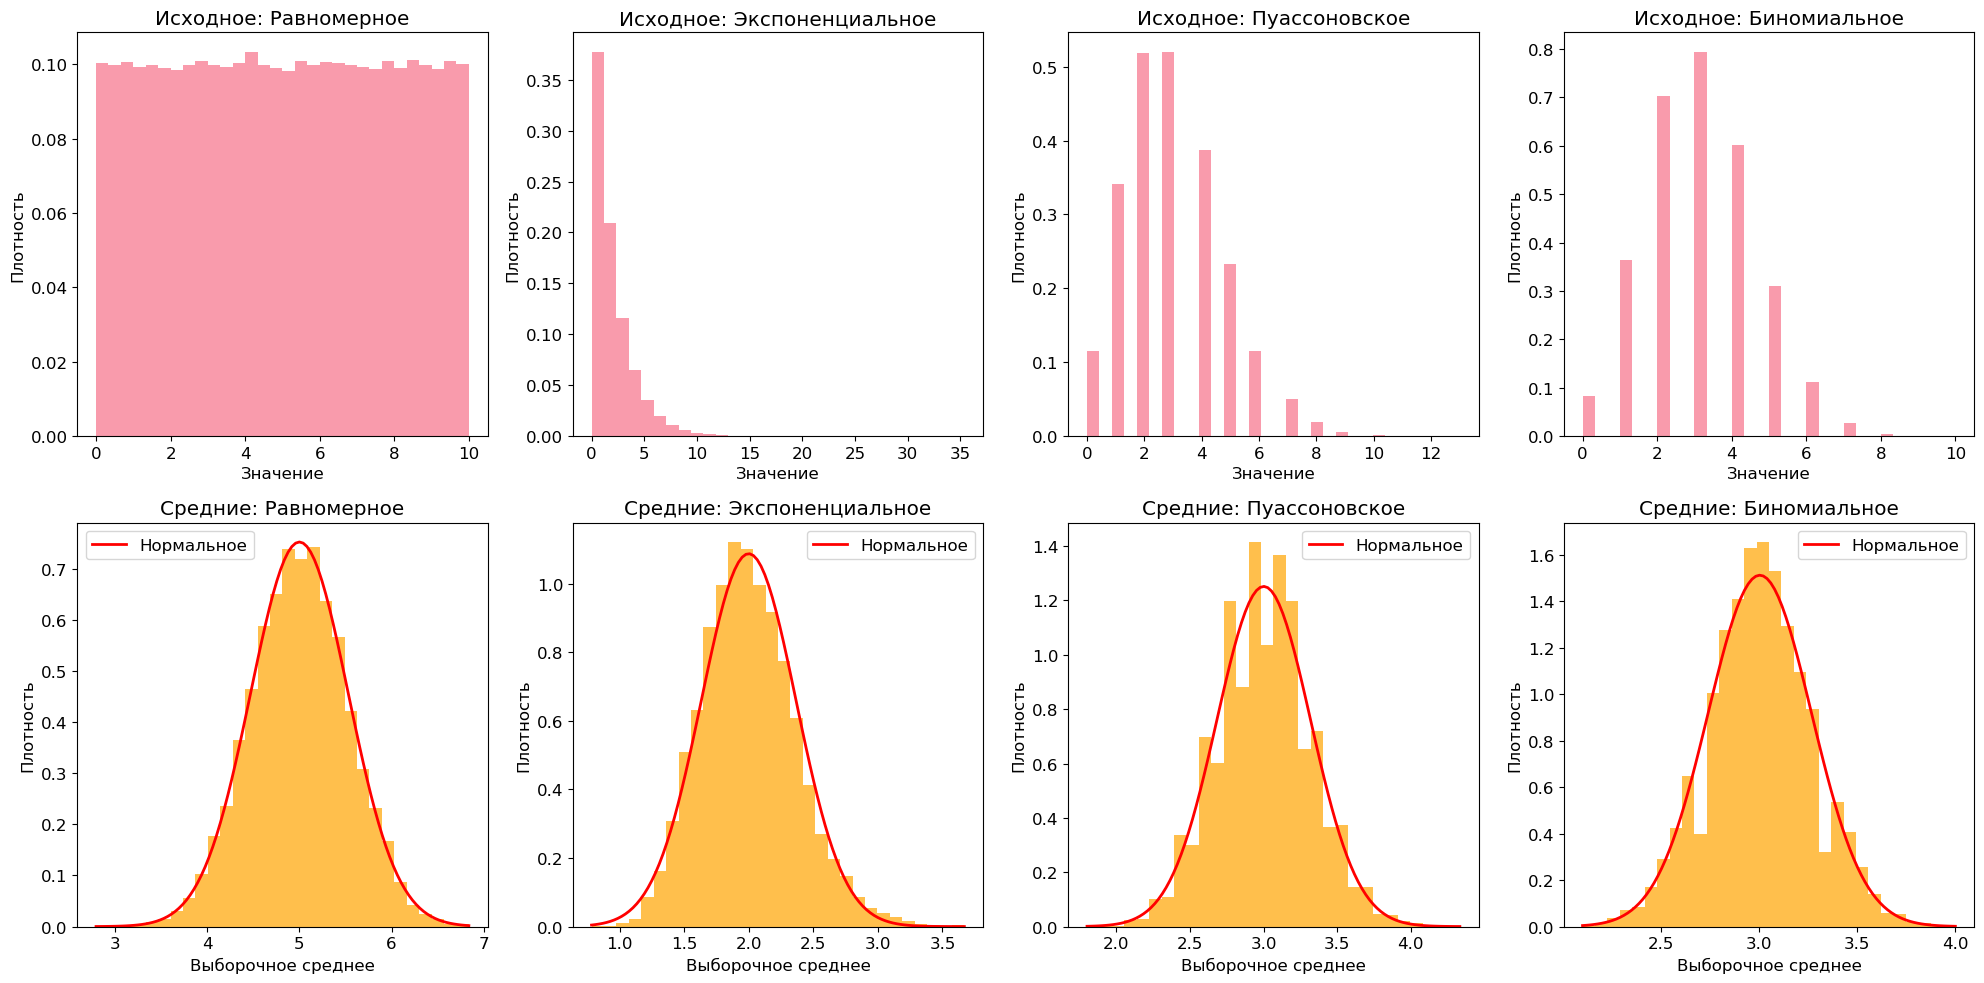

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Параметры
n_samples = 10000
sample_size = 30

# Сравнение ЦПТ для разных типов распределений
distributions = {
    'Равномерное': np.random.uniform(0, 10, (n_samples, sample_size)),
    'Экспоненциальное': np.random.exponential(2, (n_samples, sample_size)),
    'Пуассоновское': np.random.poisson(3, (n_samples, sample_size)),
    'Биномиальное': np.random.binomial(10, 0.3, (n_samples, sample_size))
}

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (name, data) in enumerate(distributions.items()):
    # Исходное распределение (верхняя строка)
    axes[0, i].hist(data.flatten(), bins=30, density=True, alpha=0.7, label=name)
    axes[0, i].set_title(f'Исходное: {name}')
    axes[0, i].set_xlabel('Значение')
    axes[0, i].set_ylabel('Плотность')
    
    # Распределение средних (нижняя строка)
    means = np.mean(data, axis=1)
    axes[1, i].hist(means, bins=30, density=True, alpha=0.7, color='orange')
    axes[1, i].set_title(f'Средние: {name}')
    axes[1, i].set_xlabel('Выборочное среднее')
    axes[1, i].set_ylabel('Плотность')
    
    # Добавляем нормальное распределение
    x = np.linspace(np.min(means), np.max(means), 100)
    axes[1, i].plot(x, stats.norm.pdf(x, np.mean(means), np.std(means)), 'r-', lw=2, label='Нормальное')
    axes[1, i].legend()

plt.tight_layout()
plt.show()